In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
cdf = pd.read_csv("datos_de_clientes.csv", delimiter="\t")
cdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Lograr separar las columnas


In [213]:
estado_social = set(cdf["Marital_Status"])
estado_social

{'Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO'}

In [214]:
absurd = 'Absurd'
conteo_social_absurd = (cdf['Marital_Status'] == absurd).sum()
print(f'El estado "{absurd}" se repite {conteo_social_absurd} veces.')

yolo = 'YOLO'
conteo_social_yolo = (cdf['Marital_Status'] == yolo).sum()
print(f'El estado "{yolo}" se repite {conteo_social_yolo} veces.')

alone = 'Alone'
conteo_social_alone = (cdf['Marital_Status'] == alone).sum()
print(f'El estado "{alone}" se repite {conteo_social_alone} veces.')

El estado "Absurd" se repite 2 veces.
El estado "YOLO" se repite 2 veces.
El estado "Alone" se repite 3 veces.


In [215]:
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'YOLO'].index)
cdf = cdf.drop(cdf[cdf['Marital_Status'] == 'Absurd'].index)
cdf = cdf.replace('Alone', 'Single')

divorced = 'Divorced'
conteo_social_divorced = (cdf['Marital_Status'] == divorced).sum()
print(f'El estado "{divorced}" se repite {conteo_social_divorced} veces.')

single = 'Single'
conteo_social_single = (cdf['Marital_Status'] == single).sum()
print(f'El estado "{single}" se repite {conteo_social_single} veces.')

married = 'Married'
conteo_social_married = (cdf['Marital_Status'] == married).sum()
print(f'El estado "{married}" se repite {conteo_social_married} veces.')

widow = 'Widow'
conteo_social_widow = (cdf['Marital_Status'] == widow).sum()
print(f'El estado "{widow}" se repite {conteo_social_widow} veces.')

together = 'Together'
conteo_social_together = (cdf['Marital_Status'] == together).sum()
print(f'El estado "{together}" se repite {conteo_social_together} veces.')

estado_social = set(cdf["Marital_Status"])
estado_social

El estado "Divorced" se repite 232 veces.
El estado "Single" se repite 483 veces.
El estado "Married" se repite 864 veces.
El estado "Widow" se repite 77 veces.
El estado "Together" se repite 580 veces.


{'Divorced', 'Married', 'Single', 'Together', 'Widow'}

In [216]:
cdf.iloc[:,3]

cdf = cdf.replace('Married', 'Couple')
cdf = cdf.replace('Together', 'Couple')
cdf = cdf.replace('Divorced', 'Single')
cdf = cdf.replace('Widow', 'Single')

social_numerico = {'Couple': 0, 'Single': 1}
cdf['Marital_Num'] = cdf['Marital_Status'].map(social_numerico)
soc_num = cdf.pop('Marital_Num')
cdf.insert(3, 'Marital_Num', soc_num)

cdf = cdf.drop(['Marital_Status'], axis=1)
cdf

,ID,Year_Birth,Education,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [217]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Education': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Kidhome': 5
Índice de la columna 'Teenhome': 6
Índice de la columna 'Dt_Customer': 7
Índice de la columna 'Recency': 8
Índice de la columna 'MntWines': 9
Índice de la columna 'MntFruits': 10
Índice de la columna 'MntMeatProducts': 11
Índice de la columna 'MntFishProducts': 12
Índice de la columna 'MntSweetProducts': 13
Índice de la columna 'MntGoldProds': 14
Índice de la columna 'NumDealsPurchases': 15
Índice de la columna 'NumWebPurchases': 16
Índice de la columna 'NumCatalogPurchases': 17
Índice de la columna 'NumStorePurchases': 18
Índice de la columna 'NumWebVisitsMonth': 19
Índice de la columna 'AcceptedCmp3': 20
Índice de la columna 'AcceptedCmp4': 21
Índice de la columna 'AcceptedCmp5': 22
Índice de la columna 'AcceptedCmp1': 23
Índice de la columna 'AcceptedCmp2': 24
Índice de la column

In [218]:
education = set(cdf["Education"])
education

{'2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'}

In [219]:
second_cycle = '2n Cycle'
conteo_educacional_second_cycle = (cdf['Education'] == second_cycle).sum()
print(f'El estado "{second_cycle}" se repite {conteo_educacional_second_cycle} veces.')

basic = 'Basic'
conteo_educacional_basic = (cdf['Education'] == basic).sum()
print(f'El estado "{basic}" se repite {conteo_educacional_basic} veces.')

graduation = 'Graduation'
conteo_educacional_graduation = (cdf['Education'] == graduation).sum()
print(f'El estado "{graduation}" se repite {conteo_educacional_graduation} veces.')

master = 'Master'
conteo_educacional_master = (cdf['Education'] == master).sum()
print(f'El estado "{master}" se repite {conteo_educacional_master} veces.')

phd = 'PhD'
conteo_educacional_phd = (cdf['Education'] == phd).sum()
print(f'El estado "{phd}" se repite {conteo_educacional_phd} veces.')

El estado "2n Cycle" se repite 203 veces.
El estado "Basic" se repite 54 veces.
El estado "Graduation" se repite 1126 veces.
El estado "Master" se repite 369 veces.
El estado "PhD" se repite 484 veces.


In [220]:
cdf.iloc[:,2]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2236, dtype: object

In [221]:
educacion_numerico = {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
cdf['Educational_Num'] = cdf['Education'].map(educacion_numerico)
ed_num = cdf.pop('Educational_Num')
cdf.insert(3, 'Educational_num', ed_num)
cdf = cdf.drop(['Education'], axis=1)

cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,1,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,1,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,0,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,0,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,0,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,0,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,1,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,0,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [222]:
cdf['Young_Sons'] = cdf['Kidhome'] + cdf['Teenhome']
hijos = cdf.pop('Young_Sons')
cdf.insert(7, 'Young_Sons', hijos)
hijos = cdf.iloc[:, [7]]
cdf = cdf.drop(['Kidhome', 'Teenhome'], axis=1)

hijos = cdf.pop('Young_Sons')
cdf.insert(9, 'Young_Sons', hijos)

In [223]:
cdf['Deals_Accepted'] = cdf['AcceptedCmp1'] + cdf['AcceptedCmp2'] + cdf['AcceptedCmp3'] + cdf['AcceptedCmp4'] + cdf['AcceptedCmp5']
ofertas = cdf.pop('Deals_Accepted')
cdf.insert(19, 'Deals_Accepted', ofertas)
ofertas = cdf.iloc[:, [19]]
print(ofertas)
cdf = cdf.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

      Deals_Accepted
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
2235               0
2236               1
2237               1
2238               0
2239               0

[2236 rows x 1 columns]


In [224]:
cdf = cdf.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
cdf

,ID,Year_Birth,Educational_num,Marital_Num,Income,Dt_Customer,Recency,MntWines,MntFruits,Young_Sons,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524,1957,2,1,58138.0,04-09-2012,58,635,88,0,...,88,88,3,8,10,4,7,0,0,1
1,2174,1954,2,1,46344.0,08-03-2014,38,11,1,2,...,1,6,2,1,1,2,5,0,0,0
2,4141,1965,2,0,71613.0,21-08-2013,26,426,49,0,...,21,42,1,8,2,10,4,0,0,0
3,6182,1984,2,0,26646.0,10-02-2014,26,11,4,1,...,3,5,2,2,0,4,6,0,0,0
4,5324,1981,4,0,58293.0,19-01-2014,94,173,43,1,...,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,0,61223.0,13-06-2013,46,709,43,1,...,118,247,2,9,3,4,5,0,0,0
2236,4001,1946,4,0,64014.0,10-06-2014,56,406,0,3,...,0,8,7,8,2,5,7,1,0,0
2237,7270,1981,2,1,56981.0,25-01-2014,91,908,48,0,...,12,24,1,2,3,13,6,1,0,0
2238,8235,1956,3,0,69245.0,24-01-2014,8,428,30,1,...,30,61,2,6,5,10,3,0,0,0


In [225]:
idx_columnas = cdf.columns.tolist()
for idx, nombre_columna in enumerate(idx_columnas):
    print(f"Índice de la columna '{nombre_columna}': {idx}")

Índice de la columna 'ID': 0
Índice de la columna 'Year_Birth': 1
Índice de la columna 'Educational_num': 2
Índice de la columna 'Marital_Num': 3
Índice de la columna 'Income': 4
Índice de la columna 'Dt_Customer': 5
Índice de la columna 'Recency': 6
Índice de la columna 'MntWines': 7
Índice de la columna 'MntFruits': 8
Índice de la columna 'Young_Sons': 9
Índice de la columna 'MntMeatProducts': 10
Índice de la columna 'MntFishProducts': 11
Índice de la columna 'MntSweetProducts': 12
Índice de la columna 'MntGoldProds': 13
Índice de la columna 'NumDealsPurchases': 14
Índice de la columna 'NumWebPurchases': 15
Índice de la columna 'NumCatalogPurchases': 16
Índice de la columna 'NumStorePurchases': 17
Índice de la columna 'NumWebVisitsMonth': 18
Índice de la columna 'Deals_Accepted': 19
Índice de la columna 'Complain': 20
Índice de la columna 'Response': 21


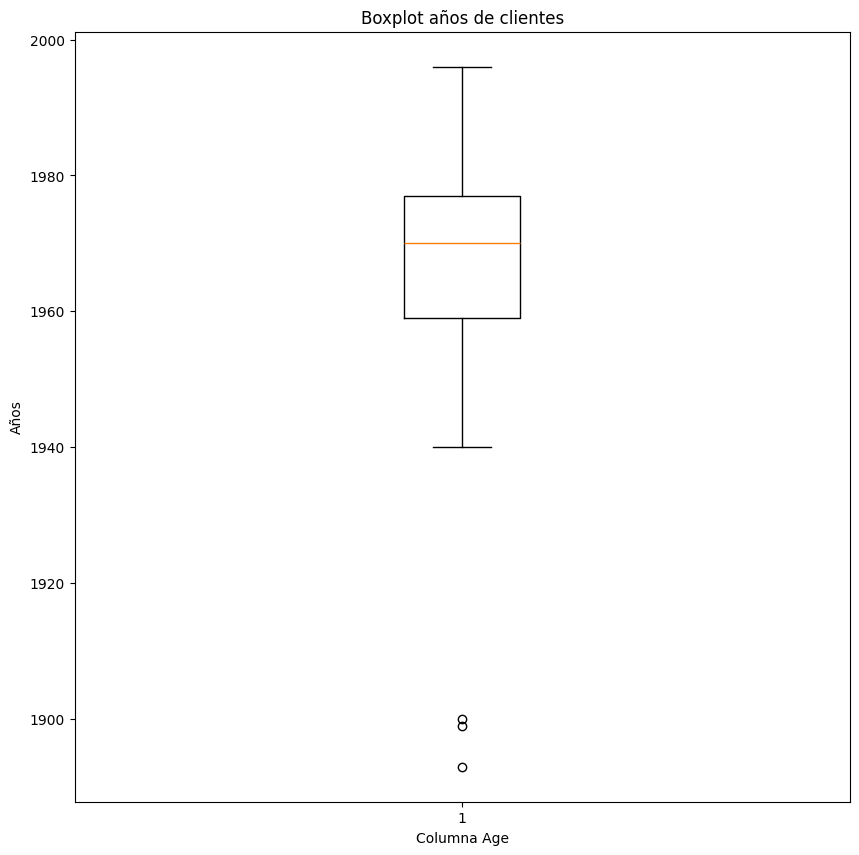

In [226]:
years = cdf.iloc[:, 1]
plt.figure(figsize =(10, 10))
plt.boxplot(years)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()

In [227]:
cdf = cdf[cdf.Year_Birth > 1920]

In [228]:
tiempo_actual = 2024
cdf['Age'] = tiempo_actual - cdf['Year_Birth']
edad = cdf.pop('Age')
cdf.insert(2, 'Age', edad)

C:\Users\Deutsch\AppData\Local\Temp\ipykernel_9580\3321122870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Age'] = tiempo_actual - cdf['Year_Birth']


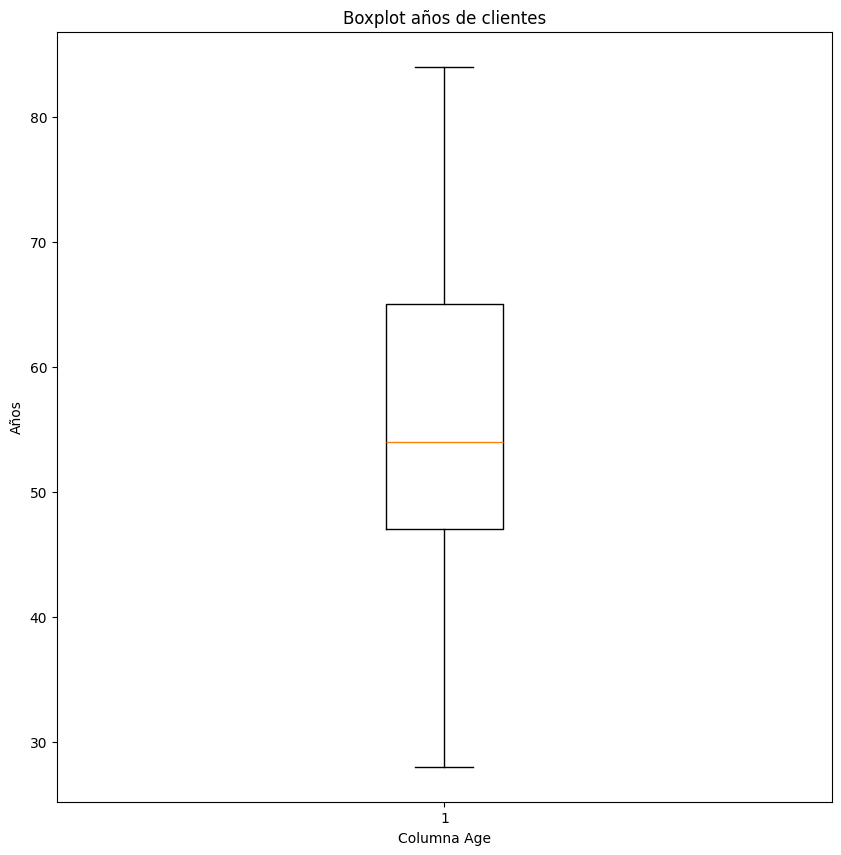

El valor de la mediana es  54.0
El valor de la media es  55.10747872816838


In [229]:
edad = cdf.iloc[:, 2]
mediana = np.median(edad)
media = np.mean(edad)
plt.figure(figsize =(10, 10))
plt.boxplot(edad)
plt.title('Boxplot años de clientes')
plt.ylabel('Años')
plt.xlabel('Columna Age')
plt.show()
print("El valor de la mediana es ", mediana)
print("El valor de la media es ", media)

In [230]:
edadMinima = cdf['Year_Birth'].max()
edadMinima

1996

In [231]:
cdf

,ID,Year_Birth,Age,Educational_num,Marital_Num,Income,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Deals_Accepted,Complain,Response
0,5524,1957,67,2,1,58138.0,04-09-2012,58,635,88,...,88,88,3,8,10,4,7,0,0,1
1,2174,1954,70,2,1,46344.0,08-03-2014,38,11,1,...,1,6,2,1,1,2,5,0,0,0
2,4141,1965,59,2,0,71613.0,21-08-2013,26,426,49,...,21,42,1,8,2,10,4,0,0,0
3,6182,1984,40,2,0,26646.0,10-02-2014,26,11,4,...,3,5,2,2,0,4,6,0,0,0
4,5324,1981,43,4,0,58293.0,19-01-2014,94,173,43,...,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,2,0,61223.0,13-06-2013,46,709,43,...,118,247,2,9,3,4,5,0,0,0
2236,4001,1946,78,4,0,64014.0,10-06-2014,56,406,0,...,0,8,7,8,2,5,7,1,0,0
2237,7270,1981,43,2,1,56981.0,25-01-2014,91,908,48,...,12,24,1,2,3,13,6,1,0,0
2238,8235,1956,68,3,0,69245.0,24-01-2014,8,428,30,...,30,61,2,6,5,10,3,0,0,0


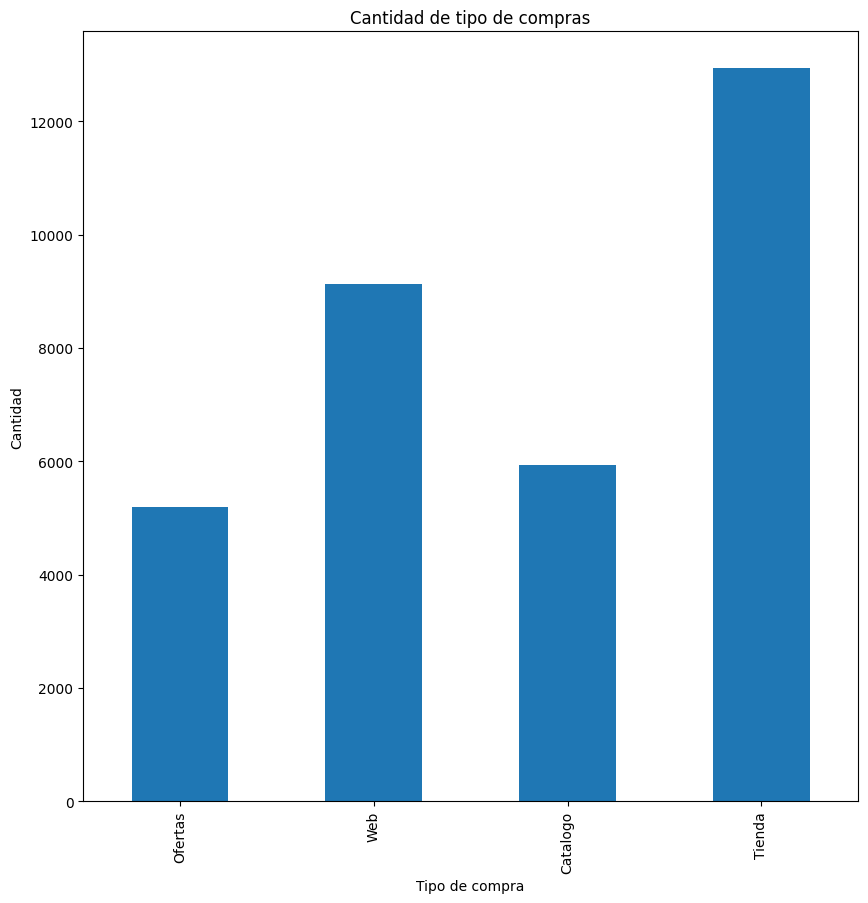

In [237]:
suma_ofertas = cdf['NumDealsPurchases'].sum()
suma_web = cdf['NumWebPurchases'].sum()
suma_catalogo = cdf['NumCatalogPurchases'].sum()
suma_tienda = cdf['NumStorePurchases'].sum()

cantidad_compras = pd.Series([suma_ofertas, suma_web, suma_catalogo, suma_tienda])
plt.figure(figsize=(10,10))
cantidad_compras.plot(kind='bar')
plt.title('Cantidad de tipo de compras')
plt.xlabel('Tipo de compra')
plt.ylabel('Cantidad')
plt.xticks(range(len(cantidad_compras)), ['Ofertas', 'Web', 'Catalogo', 'Tienda'])
plt.show()

In [241]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_normalize_range = ['MntWines', 'MntFruits', 'MntProteinProducts']
columns_to_normalize_z = ['Income']

cdf_normalized = cdf.copy()

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

cdf_normalized[columns_to_normalize_z] = scaler.fit_transform(cdf_normalized[columns_to_normalize_z])

cdf_normalized[columns_to_normalize_range] = min_max_scaler.fit_transform(cdf_normalized[columns_to_normalize_range])

display(cdf_normalized)

KeyError: "['MntProteinProducts'] not in index"

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

def cluster_analysis(df):
    # Lista de métricas para evaluar los clusters
    metrics_names = ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']

    # Rango de cantidad de clusters a probar
    cluster_range = range(2, 10)

    # Inicializar listas para almacenar los resultados de cada métrica
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    # Realizar la clusterización para cada cantidad de clusters
    for n_clusters in cluster_range:
        # K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(df)

        # DBSCAN clustering
        dbscan = DBSCAN()
        dbscan_labels = dbscan.fit_predict(df)

        # Calcular las métricas para K-Means
        silhouette_scores.append(metrics.silhouette_score(df, kmeans_labels))
        ch_scores.append(metrics.calinski_harabasz_score(df, kmeans_labels))
        db_scores.append(metrics.davies_bouldin_score(df, kmeans_labels))

    # Crear gráficos para cada métrica
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    axs[0].plot(cluster_range, silhouette_scores, marker='o')
    axs[0].set_title('Silhouette Score')
    axs[0].set_xlabel('Number of Clusters')
    axs[0].set_ylabel('Score')

    axs[1].plot(cluster_range, ch_scores, marker='o')
    axs[1].set_title('Calinski-Harabasz Score')
    axs[1].set_xlabel('Number of Clusters')
    axs[1].set_ylabel('Score')

    axs[2].plot(cluster_range, db_scores, marker='o')
    axs[2].set_title('Davies-Bouldin Score')
    axs[2].set_xlabel('Number of Clusters')
    axs[2].set_ylabel('Score')

    plt.tight_layout()
    plt.show()

# Llamar a la función para realizar el análisis de clusterización
cluster_analysis(cdf_normalized)


ValueError: could not convert string to float: 'Single'